In [58]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query3 = """
SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)"
FROM 
  (SELECT 
      selectsystems.record_id as "ID", experts.name, selectsystems.created as "date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON cast(selectsystems.expert as text) = cast(experts.id as text)) "source"
  """
dataset3 = sqlio.read_sql_query(query3,conn)
df3 = pd.DataFrame(data=dataset3)
print(df3)

   Percentage of Active Experts (%)
0                         26.069519


In [86]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query3 = """
SELECT count(*), to_char("source"."date",'YYYY-MM')
FROM 
  (SELECT 
      selectsystems.record_id as "ID", experts.name, cast(selectsystems.created as date) as "date"
    FROM 
      experts 
      INNER JOIN selectsystems 
      ON cast(selectsystems.expert as text) = cast(experts.id as text)) "source"
      GROUP BY to_char("source"."date",'YYYY-MM')
      ORDER BY to_char("source"."date",'YYYY-MM') DESC
  """
dataset3 = sqlio.read_sql_query(query3,conn)
df3 = pd.DataFrame(data=dataset3)
print(df3)

    count  to_char
0       1  2022-06
1      33  2022-05
2       5  2022-04
3      16  2022-03
4      11  2022-02
5       8  2022-01
6       6  2021-12
7      15  2021-11
8      17  2021-10
9       7  2021-09
10     29  2021-08
11     10  2021-07
12      6  2021-05
13      2  2021-04
14     17  2021-03
15     12  2021-02


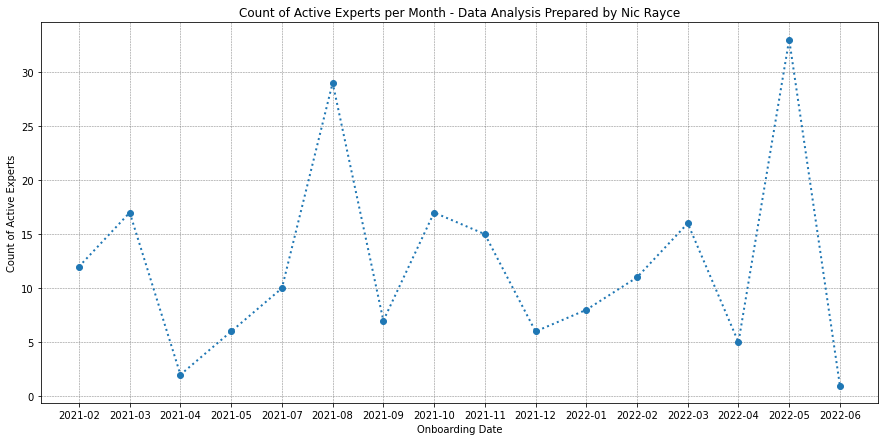

In [105]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query3 = """
SELECT 
  count(*) as "Count of Active Experts", 
  to_char("source"."date", 'YYYY-MM') as "Onboarding Date" 
FROM 
  (
    SELECT 
      selectsystems.record_id as "ID", 
      experts.name, 
      cast(selectsystems.created as date) as "date" 
    FROM 
      experts 
      INNER JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  ) "source" 
GROUP BY 
  to_char("source"."date", 'YYYY-MM') 
ORDER BY 
  to_char("source"."date", 'YYYY-MM') ASC
  """
dataset3 = sqlio.read_sql_query(query3,conn)
df3 = pd.DataFrame(data=dataset3)
    
# Define Data
xdata=df3['Onboarding Date']
ydata=df3['Count of Active Experts']
    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata, ydata, 'o', linestyle = 'dotted', linewidth=2)
plt.title("Count of Active Experts per Month - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Onboarding Date')
plt.ylabel('Count of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()
